# Regression Models Analysis on House Sales Data

# Business Problem

ABC company intereste to buy property in King County. They are new to the area, and interest about the housing in Seattle. They want to decide if they should buy property in Seattle or other area within King County.

The goal is to use regression models to predict sale price and translate these findings into actionable insights for ABC company.

Library that are used for the data analysis

In [1197]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# visualization
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler

#one hot encoding
from sklearn.preprocessing import OneHotEncoder
#linear regression model
from sklearn.linear_model import LinearRegression
#evalutate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# for QQ plot
import scipy.stats as stats
# evaluation on test data
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

King County House Sales dataset


This data set can be found in kc_house_data.csv in the following GitHub repository
https://github.com/learn-co-curriculum/dsc-phase-2-project-v2-3

In [1198]:
# will use this table to do regression analysis to analyze King county house sales and predict house sale price
file_path = "\\Users\\eggfr\\Flatiron\\Flatiron_phase2_project\\dsc-phase-2-project\\data\\kc_house_data.csv"
project2_raw_df = pd.read_csv(file_path)

<AxesSubplot:>

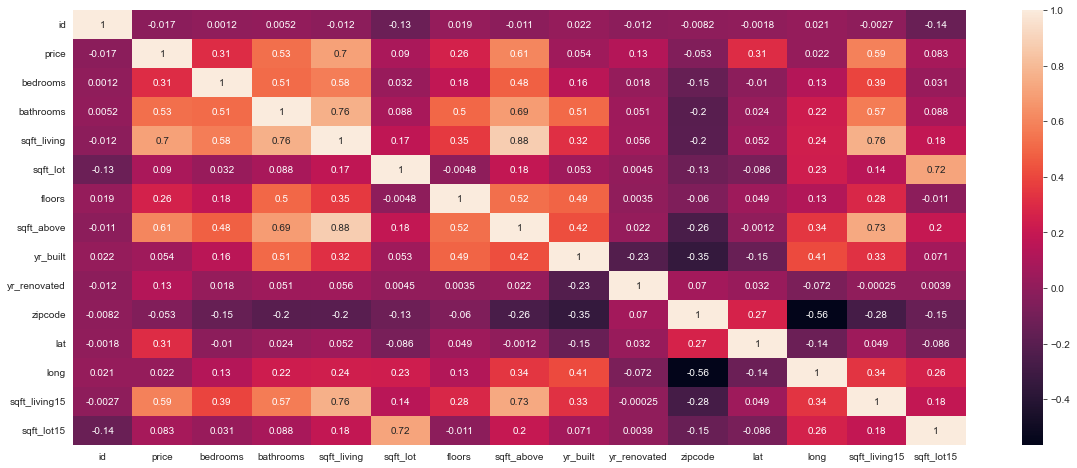

In [1199]:
plt.figure(figsize=(20,8))
sns.heatmap(project2_raw_df.corr(),annot = True)

Column Names and Description

# id: Unique ID for each home sold
date: Date of the home sale
price: Price of each home sold
bedrooms: Number of bedrooms
bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living: Square footage of the apartments interior living space
sqft_lot: Square footage of the land space
floors: Number of floors
waterfront: - A dummy variable for whether the apartment was overlooking the waterfront or not
view: An index from 0 to 4 of how good the view of the property was
condition: - An index from 1 to 5 on the condition of the apartment,
grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above: The square footage of the interior housing space that is above ground level
sqft_basement: The square footage of the interior housing space that is below ground level
yr_built: The year the house was initially built
yr_renovated: The year of the house’s last renovation
zipcode: What zipcode area the house is in
lat: Lattitude
long: Longitude
sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

In [1200]:
project2_raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [1201]:
y = project2_raw_df['price']
X= project2_raw_df.drop('price',1)
X.shape

C:\Users\eggfr\AppData\Local\Temp\ipykernel_14276\2521427708.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= project2_raw_df.drop('price',1)


(21597, 20)

# Train test split

Separating data into training and testing sets is an important part of evaluating the models.Most of the data is used for training, and a smaller portion of the data is used for testing. For this analysis: we only split data into train and test. 75% of the data is for training and 25% for test. Also, the data split happened before we even do any EDA analysis to prevent data leakage. There is 16197 row of datas for the train set and 5400 rows of the data for test set before any data cleaning or analysis is done.


In [1202]:
#create train-test set using 75%-25% ratio for the train set and test set and set the random state = 42) randomly split the data
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=0.25,random_state=42)
# shape of train and test splits
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16197, 20), (5400, 20), (16197,), (5400,))

# Data cleaning

# Checking category type for each column

OLS analysis only take data type in numerical form (int64 or float64). We need to change the categotical data into numerical form. Also, we need to check missing data for each column. The section below shows there is missing values on the category of waterfront, view, and year renovated. We will go through every category and clean the data as necessary before OLS analysis.

We need to check missing value and data type. We need to identify categorical nominal variable and categotical oridnal variable. For categorical nominal variable, we need to transform it to numerical form using One Hot Encdoing method. No adjustment is needed for categotical ordinal variable.

Also, We have to make changes for both sets since we split our data into train set and test set. Otherwise, the analysis will be incorrect.

Checking datatype of the data

In [1203]:
project2_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Checking missing value of the data

In [1204]:
# determine count of missing values in table
project2_raw_df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Preprocessing date-month-year

In [1205]:
#Split date, year, month into seperate columns
x_train['date'] = pd.to_datetime(x_train['date'])
x_train['month'] = x_train['date'].apply(lambda date:date.month)
x_train['year'] = x_train['date'].apply(lambda date:date.year)
x_train = x_train.drop('date',axis=1)

x_test['date'] = pd.to_datetime(x_test['date'])
x_test['month'] = x_test['date'].apply(lambda date:date.month)
x_test['year'] = x_test['date'].apply(lambda date:date.year)
x_test = x_test.drop('date',axis=1)


Preprocessing sqft_basement

There is missing value in "sqft_basement" variable. I will replace the 1 missing value with the mean of the value, which is 297.

In [1206]:
#checking unique category for column ('sqft_basement'), there is a datadype'?''.we replace it withe mean of value.
project2_raw_df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [1207]:
# change the inproper datatype for 'sqft_basement' and replace it withe mean of value, 297.
x_train['sqft_basement'] = x_train['sqft_basement'].apply(lambda x: float(x.replace("?", "297")))
x_train['sqft_basement'] = x_train['sqft_basement'].apply(lambda x: float(x))
#x_train['sqft_basement'].dtype
x_test['sqft_basement'] = x_test['sqft_basement'].apply(lambda x: float(x.replace("?", "297")))
x_test['sqft_basement'] = x_test['sqft_basement'].apply(lambda x: float(x))



Preprocessing floors

Checking the category type for variable "floors". No action is needed as it is categorical ordinal variable.

In [1208]:
#check the category of floors- categorical ordinal variable. No adjustment is needed.
project2_raw_df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Preprocessing waterfront

There is missing value in "waterfront" variable, and majority of the "waterfront" is None. I will replace the missing values with No data type. Also, waterfront is also a categorical variable, it will be transformed into 1 for yes and 0 for no.

In [1209]:
# percentage of waterfront in the sale data.
project2_raw_df['waterfront'].value_counts(normalize = True)

NO     0.992404
YES    0.007596
Name: waterfront, dtype: float64

In [1210]:
#fill na with no value and change yes to 1 n no to 0 #since majority of the sales has no waterfront.
x_train['waterfront'] = x_train['waterfront'].fillna(value = 'NO')
x_train['waterfront'] = x_train['waterfront'].replace(to_replace = ['YES','NO'],value = [1,0])
x_train['waterfront'].value_counts()


0    16086
1      111
Name: waterfront, dtype: int64

In [1211]:
x_test['waterfront'] = x_test['waterfront'].fillna(value = 'NO')
x_test['waterfront'] = x_test['waterfront'].replace(to_replace = ['YES','NO'],value = [1,0])
x_test['waterfront'].value_counts()

0    5365
1      35
Name: waterfront, dtype: int64

Preprocessing view

There is missing value in "view" variable, and majority of the "view" is None. I will replace the missing values with None data type. Also, view is also a categorical variable, it will be transformed into 0 to 4 with 0 as none and 4 as excellent

In [1212]:
project2_raw_df['view'].value_counts(normalize = True)


NONE         0.901923
AVERAGE      0.044441
GOOD         0.023591
FAIR         0.015325
EXCELLENT    0.014721
Name: view, dtype: float64

In [1213]:
# fill na with no value -->majority is none and could be N/A as none as well. n change the catgorical ordinal in to 0 to 4 with 0 to none and 4 to excellent
x_train['view'] = x_train['view'].fillna(value = 'NONE')
x_test['view'] = x_test['view'].fillna(value = 'NONE')
x_train['view'] = x_train['view'].replace(to_replace = ['NONE','AVERAGE','GOOD','FAIR','EXCELLENT'],value = [0,1,2,3,4])
x_test['view'] = x_test['view'].replace(to_replace = ['NONE','AVERAGE','GOOD','FAIR','EXCELLENT'],value = [0,1,2,3,4])

Preprocessing Condition

There is no missing value on 'condition' variable, so no replacement is needed. 'Condition' is a categorical ordinal variable, it will be transformed into 0 to 4 with 0 as poor and 4 as very good.

In [1214]:
project2_raw_df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [1215]:
# replace cateogrical rating with (0 to 4 scale. 0 - Poor, and 4 - Very Good)
x_train['condition'] = x_train['condition'].replace(to_replace = ['Poor','Fair','Average','Good','Very Good'],value = [0,1,2,3,4])
x_test['condition'] = x_test['condition'].replace(to_replace = ['Poor','Fair','Average','Good','Very Good'],value = [0,1,2,3,4])


Preprocessing Grade and create a new_grade column

There is no missing value on 'grade' variable, so no replacement is needed. However, a "new_grade" column is created and stored all the numerical value for the grade. As given from the data set, graded are scaled from 3 to 13, poor to mension.

In [1216]:
project2_raw_df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [1217]:
# grab the numerical rating and assign it to interger type
x_train['new_grade'] = x_train['grade'].astype(str).str[0]
x_train['new_grade'] = x_train['new_grade'].astype(int)
x_test['new_grade'] = x_test['grade'].astype(str).str[0]
x_test['new_grade'] = x_test['new_grade'].astype(int)


In [1218]:
#drop the string grade column
x_train = x_train.drop(columns='grade')
x_test = x_test.drop(columns='grade')

Preprocessing bedrooms

Checking the category type for variable "bedrooms". No action is needed as it is categorical ordinal variable.

In [1219]:
project2_raw_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Preprocessing bathrooms

Checking the category type for variable "bathrooms". No action is needed as it is categorical ordinal variable.

In [1220]:
project2_raw_df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Set up a new group "seattle"

Going to create a new column as seattle by zipcode which it solely belongs https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033 

In [1221]:
#grouping seattle into zipcode which it solely belongs https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033 
x_train['seattle'] = x_train['zipcode'].apply(lambda x : 0 if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 1) 
x_test['seattle'] = x_test['zipcode'].apply(lambda x : 0 if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 1) 


Preprocessing zipcode via One Hot Encoding

While zipcode is numerical variable in the data table, it is categorical nominal variable. Different zipcode means different category. We are going to transform it into a numerical variable via One Hot Encoding.

In [1222]:
#onehot Econdinf zipcode for x_train
ohe = OneHotEncoder(drop='first')
data =  x_train[['zipcode']]

view_df = pd.DataFrame(ohe.fit_transform(data).toarray(), index = x_train.index) #index = x_train.index to match x_train index for concat later
view_df.columns = ohe.get_feature_names()   #use get_feature_names() to get feature name back after one hot encoding

x_train = pd.concat([x_train,view_df],axis=1)
x_train.shape

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(16197, 91)

In [1223]:
#onehot Econdinf zipcode for x_test
ohe = OneHotEncoder(drop='first')
data =  x_test[['zipcode']]

view_df = pd.DataFrame(ohe.fit_transform(data).toarray(), index = x_test.index) #index = x_train.index to match x_train index for concat later
view_df.columns = ohe.get_feature_names()   #use get_feature_names() to get feature name back after one hot encoding

x_test = pd.concat([x_test,view_df],axis=1)
x_test.shape

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(5400, 91)

Preprocessing yr_renovated and create is_renovated

yr_renovated is an indication if the house is renovated. There is 0.0 in the value counts and that shows there is a category that house that is not renovated. With majority of the sale is not renovated. I would assume the missing value is just not renovated, and filled the missing value with 0. Also, I also change this to a categoty variable with 0 = not renovated and 1 is renovated and stored it in a var variable, is_renovated.

In [1224]:
project2_raw_df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [1225]:
# fillna with 0 to NaN for year_renovated- assuming there is no renovation.
x_train['yr_renovated'] = x_train['yr_renovated'].fillna(value = 0)
x_test['yr_renovated'] = x_test['yr_renovated'].fillna(value = 0)

In [1226]:
x_train['is_renovated'] = x_train['yr_renovated'].apply(lambda x: 0 if x ==0 else 1)
x_test['is_renovated'] = x_test['yr_renovated'].apply(lambda x: 0 if x ==0 else 1)
#x_test['sqft_basement'] = x_test['sqft_basement'].apply(lambda x: float(x.replace("?", "297")))

# Log normal the price

Price look positively skewed with a right tail, and we may have to account for outliers later on of the analysis. For now, lets log the price so we have amore normalized distribution.

[Text(0.5, 1.0, 'Distribution of Home Sale Price')]

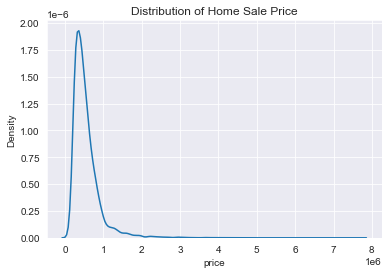

In [1227]:
p = sns.kdeplot(y_train)
p.set( title = "Distribution of Home Sale Price")

In [1228]:
#take a log on price
y_train = np.log(y_train)
y_test = np.log(y_test)


[Text(0.5, 1.0, 'Distribution of Home Sale Price')]

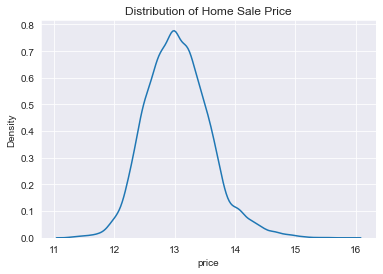

In [1229]:
p = sns.kdeplot(y_train)
p.set( title = "Distribution of Home Sale Price")

Recheck our x_train data type and missing value.

Let's recheck our data type to see if everything is numerical form and also check if we have any missing data.

In [1230]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 92 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  int64  
 7   view           16197 non-null  int64  
 8   condition      16197 non-null  int64  
 9   sqft_above     16197 non-null  int64  
 10  sqft_basement  16197 non-null  float64
 11  yr_built       16197 non-null  int64  
 12  yr_renovated   16197 non-null  float64
 13  zipcode        16197 non-null  int64  
 14  lat            16197 non-null  float64
 15  long           16197 non-null  float64
 16  sqft_living15  16197 non-null  int64  
 17  sqft_lot15     16197 non-null  int64  
 18  mon

Every category is non-null and is in either int64 or float64.

scale data w MinMaxScaler

Since 'sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15' are measured in different units, they will be scaled with MinMaxScaler

In [1231]:
#scale data w MinMaxScaler 'sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15 for both train n data set
features = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
autoscaler = MinMaxScaler()

x_train[features] = autoscaler.fit_transform(x_train[features])
x_test[features] = autoscaler.fit_transform(x_test[features])

Dropping some columns that are not useful for the analysis

In [1232]:
x_train = x_train.drop(columns=['id','year','zipcode'])
x_test = x_test.drop(columns=['id','year','zipcode'])

In [1233]:
x_test.shape

(5400, 89)

# Baseline Model (with every predictors from the data set)

I decided to use every predictors from the data as my baseline model and just to get a feeling on how this would work with linear regression.

In [1234]:
import statsmodels.api as sm
y = y_train
X= x_train
z = x_test
Hh = y_test
Xcont = sm.add_constant(X)

model = sm.OLS(endog = y, exog = Xcont)
model = sm.OLS(y,Xcont)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1196.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:06:16   Log-Likelihood:                 3736.2
No. Observations:               16197   AIC:                            -7294.
Df Residuals:                   16108   BIC:                            -6610.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -66.1026      8.076     -8.185

In [1235]:
ols = LinearRegression()

testsmodel = ols.fit(X,y)
print(testsmodel.score(X,y)) # train
print(testsmodel.score(z,Hh)) # test 
#print(cross_val_score(lr,X,y,cv=3))

0.8672853754067994
0.8254974798943956


Our baseline R2 is at 0.87. However, I am using every predictors that could be found in the dataset to achieve this. Obviously, most of our variance can be explained with every predictors as inputs.

We'll use this as a baseline moving forward and see if we can keep our R2 score close to 0.87

The Training and Test scores are with 5%, so it shows me that the our model is not underfit/overfit.

In [1236]:
model1_predictions = ols.predict(x_test)

Text(0.5, 0.98, 'prediction price vs actual sale price')

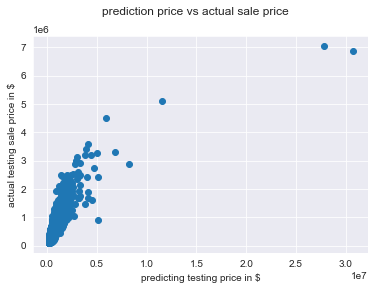

In [1237]:
fig = plt.figure()
plt.scatter(np.exp(model1_predictions), np.exp(y_test))
plt.xlabel('predicting testing price in $')
plt.ylabel('actual testing sale price in $')
fig.suptitle('prediction price vs actual sale price')


Check the Normality Assumption

Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight.. We are plotting our model residual and normal data. There is a tail on the left hand side, and we have to eliminate that.

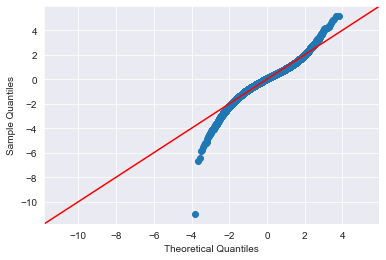

In [1238]:
fig = sm.graphics.qqplot(res.resid, dist=stats.norm, line='45', fit=True)
#fig.set_title("QQ-plot")

Baseline model residual plot

Clear underestimate when the sales price increase.Further subsetting is potentially warranted

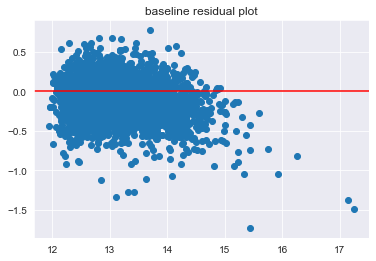

In [1239]:
plt.scatter(model1_predictions,(y_test-model1_predictions))
plt.axhline(y=0, color='r', linestyle='-')
plt.title('baseline residual plot')
plt.show()

# 2nd Model. Feature enginering with the investigation of Multicollinearity via VIF test.

All predictors are used in the baselinVe model.There are some chances that the baseline has strong multicollinearity issues. Varince_inflation_factor is used to feature select some predictors.
When WIF score is higher than 5, we consider it has some collinearity issue with other predicors. In this model, we will remove features that has VIF score higher than 5

In [1240]:
#perform vif_test
x_train_list= list(x_train.columns.values)
feature = x_train_list
X = x_train[feature]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_list = list(zip(feature, vif))
vif_scores = list(zip(feature, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))


89 35


We reduce our predictors from 89 to 35 after the VIF test

In [1241]:
y = y_train
Hh = y_test
feature = x_cols
#feature = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'month', 'new_grade', 'x0_98002', 'x0_98003', 'x0_98005', 'x0_98007', 'x0_98010', 'x0_98022', 'x0_98023', 'x0_98024', 'x0_98030', 'x0_98031', 'x0_98032', 'x0_98039', 'x0_98040', 'x0_98042', 'x0_98055', 'x0_98056', 'x0_98058', 'x0_98070', 'x0_98092', 'x0_98108', 'x0_98168', 'x0_98188', 'x0_98198']
#feature = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'month','new_grade']

X= x_train[feature]
z= x_test[feature]
Xcont = sm.add_constant(X)

model = sm.OLS(endog = y, exog = Xcont)
model = sm.OLS(y,Xcont)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     1028.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:06:27   Log-Likelihood:                -3134.9
No. Observations:               16197   AIC:                             6342.
Df Residuals:                   16161   BIC:                             6619.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            18.8851      0.208     90.737

In [1242]:
ols2 = LinearRegression()
testsmodel = ols2.fit(X,y)
print(testsmodel.score(X,y)) # train
print(testsmodel.score(z,Hh)) # test

0.689977832336111
0.6608990098137533


In [1243]:
model2_predictions = ols2.predict(z)

Model2 R2 is at 0.69. However, and some predictors is eliminated while R2 score decreases. 

The Training and Test scores are with 3%, so it shows me that the our model is not underfit/overfit.



There is outliers that should be eliminated and see how that affect the model if outliers is eliminated in later models.

Text(0.5, 0.98, 'prediction price vs actual sale price')

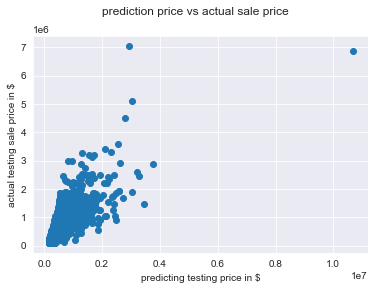

In [1244]:
fig = plt.figure()
plt.scatter(np.exp(model2_predictions), np.exp(y_test))
plt.xlabel('sale price in $')
plt.xlabel('predicting testing price in $')
plt.ylabel('actual testing sale price in $')
fig.suptitle('prediction price vs actual sale price')

QQ-plot : points forming a line that’s roughly straight line- left tail is reducing.

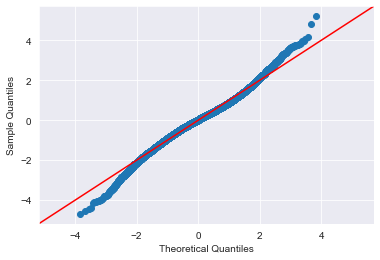

In [1245]:
fig = sm.graphics.qqplot(res.resid, dist=stats.norm, line='45', fit=True)
#ax.set_title("QQ-plot")

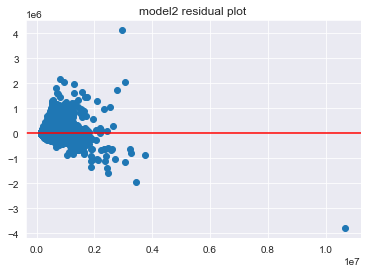

In [1246]:
plt.scatter(np.exp(model2_predictions),(np.exp(y_test)-np.exp(model2_predictions)))
plt.axhline(y=0, color='r', linestyle='-')
plt.title("model2 residual plot")
plt.show()

# 3rd Model. Feature enginering with eliminating outliers from model 2 and subsetting some inputs.

As working from the 2nd model- I see some outliers from the sale price- Lets take a look on the historgram from the original data. I am going to use 97% percentile as our subsetting range for price.

project2_raw_df.price.hist()

In [1247]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, project2_raw_df['price'].quantile(q=q)))

0.9 percentile: 887000.0
0.91 percentile: 919993.6
0.92 percentile: 950000.0
0.93 percentile: 997964.0000000001
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0


Also, I am looking at the highest coefficient from the 2nd model, and reduce outliers from the ones that have high coefficeient. The categories that will be removed some outliers as we follow.
sqft_lot is using 0.95 percentile, which is 43307
sqft_living is using 0.96 percentile, which is 3920
Bedrooms category is subsetting to 12 to remove the 33 bedrooom outlier
Bathrooms category is subsetting to 6 

In [1248]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, project2_raw_df['sqft_lot'].quantile(q=q)))

0.9 percentile: 21371.600000000006
0.91 percentile: 24149.360000000015
0.92 percentile: 28505.119999999995
0.93 percentile: 34848.0
0.94 percentile: 37643.19999999999
0.95 percentile: 43307.200000000026
0.96 percentile: 50655.28
0.97 percentile: 67381.71999999988
0.98 percentile: 107157.0


In [1249]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, project2_raw_df['sqft_living'].quantile(q=q)))

0.9 percentile: 3254.0000000000146
0.91 percentile: 3340.0
0.92 percentile: 3420.0
0.93 percentile: 3510.0
0.94 percentile: 3630.0
0.95 percentile: 3760.0
0.96 percentile: 3920.0
0.97 percentile: 4140.0
0.98 percentile: 4410.0


As we there is 33 bedrooms in our dataset, I would consider that as an outlier and drop it from our analysis.

In [1250]:
project2_raw_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [1251]:
project2_raw_df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [1252]:
rem_project2_raw_df =project2_raw_df
rem_project2_raw_df.shape

(21597, 21)

In [1253]:
rem_project2_raw_df = rem_project2_raw_df.loc[rem_project2_raw_df['price']< 11600000]
rem_project2_raw_df = rem_project2_raw_df.loc[rem_project2_raw_df['bathrooms']< 6]
rem_project2_raw_df = rem_project2_raw_df.loc[rem_project2_raw_df['bedrooms']< 12]
rem_project2_raw_df = rem_project2_raw_df.loc[rem_project2_raw_df['sqft_living']< 3920]
rem_project2_raw_df = rem_project2_raw_df.loc[rem_project2_raw_df['sqft_lot']< 43307]
rem_project2_raw_df.shape

(19800, 21)

Text(0.5, 0, 'sale price')

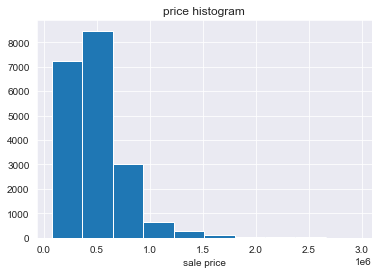

In [1254]:
rem_project2_raw_df.price.hist()
plt.title('price histogram')
plt.xlabel('sale price')

Text(0.5, 0, 'number of bedroom')

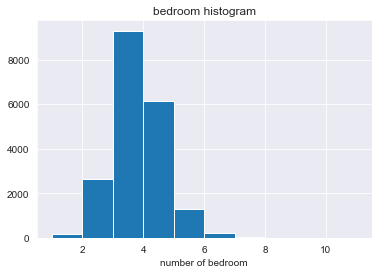

In [1255]:
rem_project2_raw_df.bedrooms.hist()
plt.title('bedroom histogram')
plt.xlabel('number of bedroom')

Text(0.5, 0, 'sqft_living')

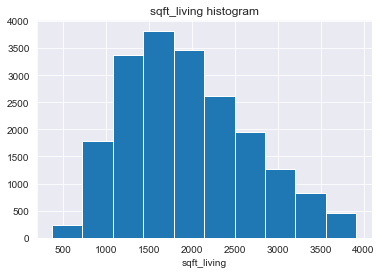

In [1256]:
rem_project2_raw_df.sqft_living.hist()
plt.title('sqft_living histogram')
plt.xlabel('sqft_living')

Text(0.5, 0, 'sqft_lot')

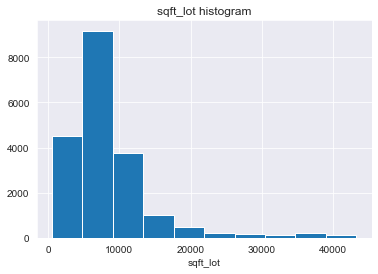

In [1257]:
rem_project2_raw_df.sqft_lot.hist()
plt.title('sqft_lot histogram')
plt.xlabel('sqft_lot')

# Re-create the data set for this model.

Since I add the conditions for several predictors, the size of the original x_train,x_test data set is going to be different. Hence, I need to recreate the x_train as x_train1, x_test as x_test1, y_train as y_train1, and y_test1. Also, two more cities categories are created in this so "seattle" data can be compated. The data set is dropped from 21597 to 19880.


In [1258]:

rem_y = rem_project2_raw_df['price']
rem_X= rem_project2_raw_df.drop('price',1)
rem_X.shape

C:\Users\eggfr\AppData\Local\Temp\ipykernel_14276\3753446219.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rem_X= rem_project2_raw_df.drop('price',1)


(19800, 20)

In [1259]:
rem_y = rem_project2_raw_df['price']
rem_X= rem_project2_raw_df.drop('price',1)

C:\Users\eggfr\AppData\Local\Temp\ipykernel_14276\2040288294.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rem_X= rem_project2_raw_df.drop('price',1)


In [1260]:
#create train-test set using 75-25 (train-test and random state = 42) randomly split the data
x_train1, x_test1, y_train1, y_test1 = train_test_split(rem_X, rem_y ,test_size=0.25,random_state=42)
# shape of train and test splits
x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape

((14850, 20), (4950, 20), (14850,), (4950,))

# Following data cleaning steps for new set od data are the same as above for 

Following data cleaning steps for new set of data ( x_train1, x_test as x_test1, y_train as y_train1, and y_test1) are the same with the original data. Please the discussion above for any pre-processing step for each predictors.

In [1261]:
rem_project2_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19800 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19800 non-null  int64  
 1   date           19800 non-null  object 
 2   price          19800 non-null  float64
 3   bedrooms       19800 non-null  int64  
 4   bathrooms      19800 non-null  float64
 5   sqft_living    19800 non-null  int64  
 6   sqft_lot       19800 non-null  int64  
 7   floors         19800 non-null  float64
 8   waterfront     17608 non-null  object 
 9   view           19745 non-null  object 
 10  condition      19800 non-null  object 
 11  grade          19800 non-null  object 
 12  sqft_above     19800 non-null  int64  
 13  sqft_basement  19800 non-null  object 
 14  yr_built       19800 non-null  int64  
 15  yr_renovated   16242 non-null  float64
 16  zipcode        19800 non-null  int64  
 17  lat            19800 non-null  float64
 18  long  

In [1262]:
rem_project2_raw_df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2192
view               55
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3558
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [1263]:
rem_project2_raw_df['seattle'] = rem_project2_raw_df['zipcode'].apply(lambda x : 0 if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 1) 
rem_project2_raw_df['seattle'] = rem_project2_raw_df['zipcode'].apply(lambda x : 0 if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 1) 
rem_project2_raw_df['kent'] = rem_project2_raw_df['zipcode'].apply(lambda x : 0 if x == 98030 or x == 98031 or x == 98032 or x == 98035 or x == 98042 or x == 98064 else 1)
rem_project2_raw_df['kent'] = rem_project2_raw_df['zipcode'].apply(lambda x : 0 if x == 98030 or x == 98031 or x == 98032 or x == 98035 or x == 98042 or x == 98064 else 1)
rem_project2_raw_df['bellevue'] = rem_project2_raw_df['zipcode'].apply(lambda x : 0 if x == 98004 or x == 98005 or x == 98006 or x == 98007 or x == 98008 or x == 98009 or x == 98015 else 1)
rem_project2_raw_df['bellevue'] = rem_project2_raw_df['zipcode'].apply(lambda x : 0 if x == 98004 or x == 98005 or x == 98006 or x == 98007 or x == 98008 or x == 98009 or x == 98015 else 1)

In [1264]:
rem_project2_raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,seattle,kent,bellevue
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,1,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,1,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,1933,NaN,98028,47.7379,-122.233,2720,8062,1,1,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0,1,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,1,1,1


In [1265]:
x_train1['date'] = pd.to_datetime(x_train1['date'])
x_train1['month'] = x_train1['date'].apply(lambda date:date.month)
x_train1['year'] = x_train1['date'].apply(lambda date:date.year)
x_train1 = x_train1.drop('date',axis=1)

x_test1['date'] = pd.to_datetime(x_test1['date'])
x_test1['month'] = x_test1['date'].apply(lambda date:date.month)
x_test1['year'] = x_test1['date'].apply(lambda date:date.year)
x_test1 = x_test1.drop('date',axis=1)


In [1266]:
# change the inproper datatype for 'sqft_basement'
x_train1['sqft_basement'] = x_train1['sqft_basement'].apply(lambda x: float(x.replace("?", "297")))
x_train1['sqft_basement'] = x_train1['sqft_basement'].apply(lambda x: float(x))
#x_train['sqft_basement'].dtype
x_test1['sqft_basement'] = x_test1['sqft_basement'].apply(lambda x: float(x.replace("?", "297")))
x_test1['sqft_basement'] = x_test1['sqft_basement'].apply(lambda x: float(x))

In [1267]:
x_train1['waterfront'] = x_train1['waterfront'].fillna(value = 'NO')
x_train1['waterfront'] = x_train1['waterfront'].replace(to_replace = ['YES','NO'],value = [1,0])
#x_train1['waterfront'].value_counts()
x_test1['waterfront'] = x_test1['waterfront'].fillna(value = 'NO')
x_test1['waterfront'] = x_test1['waterfront'].replace(to_replace = ['YES','NO'],value = [1,0])
#x_test1['waterfront'].value_counts()

In [1268]:
# fill na with no value -->majority is none and could be N/A as none as well. n change the catgorical ordinal in to 0 to 4 with 0 to none and 4 to excellent
x_train1['view'] = x_train1['view'].fillna(value = 'NONE')
x_test1['view'] = x_test1['view'].fillna(value = 'NONE')
x_train1['view'] = x_train1['view'].replace(to_replace = ['NONE','AVERAGE','GOOD','FAIR','EXCELLENT'],value = [0,1,2,3,4])
x_test1['view'] = x_test1['view'].replace(to_replace = ['NONE','AVERAGE','GOOD','FAIR','EXCELLENT'],value = [0,1,2,3,4])

In [1269]:
# replace cateogrical rating with (0 to 5 scale. 0 - Poor, and 4 - Very Good)
x_train1['condition'] = x_train1['condition'].replace(to_replace = ['Poor','Fair','Average','Good','Very Good'],value = [0,1,2,3,4])
x_test1['condition'] = x_test1['condition'].replace(to_replace = ['Poor','Fair','Average','Good','Very Good'],value = [0,1,2,3,4])


In [1270]:
# grab the numerical rating and assign it to interger type
x_train1['new_grade'] = x_train1['grade'].astype(str).str[0]
x_train1['new_grade'] = x_train1['new_grade'].astype(int)
x_test1['new_grade'] = x_test1['grade'].astype(str).str[0]
x_test1['new_grade'] = x_test1['new_grade'].astype(int)


In [1271]:
#drop the string grade column
x_train1 = x_train1.drop(columns='grade')
x_test1 = x_test1.drop(columns='grade')


In [1272]:
#grouping seattle into zipcode which it solely belongs https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033 
x_train1['seattle'] = x_train1['zipcode'].apply(lambda x : 1 if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 0) 
x_test1['seattle'] = x_test1['zipcode'].apply(lambda x : 1 if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 0) 
x_train1['kent'] = x_train1['zipcode'].apply(lambda x : 1 if x == 98030 or x == 98031 or x == 98032 or x == 98035 or x == 98042 or x == 98064 else 0)
x_test1['kent'] = x_test1['zipcode'].apply(lambda x : 1 if x == 98030 or x == 98031 or x == 98032 or x == 98035 or x == 98042 or x == 98064 else 0)
x_train1['bellevue'] = x_train1['zipcode'].apply(lambda x : 1 if x == 98004 or x == 98005 or x == 98006 or x == 98007 or x == 98008 or x == 98009 or x == 98015 else 0)
x_test1['bellevue'] = x_test1['zipcode'].apply(lambda x : 1 if x == 98004 or x == 98005 or x == 98006 or x == 98007 or x == 98008 or x == 98009 or x == 98015 else 0)

In [1273]:
x_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 13380 to 17211
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14850 non-null  int64  
 1   bedrooms       14850 non-null  int64  
 2   bathrooms      14850 non-null  float64
 3   sqft_living    14850 non-null  int64  
 4   sqft_lot       14850 non-null  int64  
 5   floors         14850 non-null  float64
 6   waterfront     14850 non-null  int64  
 7   view           14850 non-null  int64  
 8   condition      14850 non-null  int64  
 9   sqft_above     14850 non-null  int64  
 10  sqft_basement  14850 non-null  float64
 11  yr_built       14850 non-null  int64  
 12  yr_renovated   12148 non-null  float64
 13  zipcode        14850 non-null  int64  
 14  lat            14850 non-null  float64
 15  long           14850 non-null  float64
 16  sqft_living15  14850 non-null  int64  
 17  sqft_lot15     14850 non-null  int64  
 18  mo

In [1274]:
#onehot Econdinf zipcode for x1_train
ohe = OneHotEncoder(drop='first')
data =  x_train1[['zipcode']]

view_df = pd.DataFrame(ohe.fit_transform(data).toarray(), index = x_train1.index) #index = x_train.index to match x_train index for concat later
view_df.columns = ohe.get_feature_names()   #use get_feature_names() to get feature name back after one hot encoding

x_train1 = pd.concat([x_train1,view_df],axis=1)
x_train1.shape

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(14850, 93)

In [1275]:
#onehot Econdinf zipcode for x_test
ohe = OneHotEncoder(drop='first')
data =  x_test1[['zipcode']]

view_df = pd.DataFrame(ohe.fit_transform(data).toarray(), index = x_test1.index) #index = x_train.index to match x_train index for concat later
view_df.columns = ohe.get_feature_names()   #use get_feature_names() to get feature name back after one hot encoding

x_test1 = pd.concat([x_test1,view_df],axis=1)



C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [1276]:
# fillna with 0 to NaN for year_renovated- assuming there is no renovation.
x_train1['yr_renovated'] = x_train1['yr_renovated'].fillna(value = 0)
x_test1['yr_renovated'] = x_test1['yr_renovated'].fillna(value = 0)

In [1277]:
#take a log on price
y_train1 = np.log(y_train1)
y_test1 = np.log(y_test1)

In [1278]:
#scale data w MinMaxScaler 'sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15 for both train n data set
features = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
autoscaler = MinMaxScaler()

x_train1[features] = autoscaler.fit_transform(x_train1[features])
x_test1[features] = autoscaler.fit_transform(x_test1[features])

In [1279]:
x_train1 = x_train1.drop(columns=['id','year','zipcode'])
x_test1 = x_test1.drop(columns=['id','year','zipcode'])

In [1280]:
x_train1 = x_train1[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'month', 'new_grade', 'x0_98002', 'x0_98003', 'x0_98005', 'x0_98007', 'x0_98010', 'x0_98022', 'x0_98023', 'x0_98024', 'x0_98030', 'x0_98031', 'x0_98032', 'x0_98040', 'x0_98042', 'x0_98055', 'x0_98056', 'x0_98058', 'x0_98070', 'x0_98092', 'x0_98108', 'x0_98168', 'x0_98188', 'x0_98198','seattle','kent','bellevue']]
x_test1 = x_test1[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'month', 'new_grade', 'x0_98002', 'x0_98003', 'x0_98005', 'x0_98007', 'x0_98010', 'x0_98022', 'x0_98023', 'x0_98024', 'x0_98030', 'x0_98031', 'x0_98032', 'x0_98040', 'x0_98042', 'x0_98055', 'x0_98056', 'x0_98058', 'x0_98070', 'x0_98092', 'x0_98108', 'x0_98168', 'x0_98188', 'x0_98198','seattle','kent','bellevue']]

In [1281]:
import statsmodels.api as sm
y = y_train1
X= x_train1
z = x_test1
Hh = y_test1
Xcont = sm.add_constant(X)

model = sm.OLS(endog = y, exog = Xcont)
model = sm.OLS(y,Xcont)
res = model.fit()
#testmodel = sm.OLS(z,Hh).fit()
#print(testmodel.summary())
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     763.7
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:06:29   Log-Likelihood:                -2409.1
No. Observations:               14850   AIC:                             4894.
Df Residuals:                   14812   BIC:                             5183.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.5330      0.240     73.029

In [1282]:
ols3 = LinearRegression()
testsmodel = ols3.fit(X,y)
print(testsmodel.score(X,y)) # train
print(testsmodel.score(z,Hh)) # test

0.6560789707694621
0.6341207882572899


Model3 R2 is at 0.65. However, and some outliers is eliminated while R2 score decreases. 

The Training and Test scores are with 2%, so it shows me that the our model is not underfit/overfit.

In [1283]:
#plt.scatter(np.exp(model3_prediction), np.exp(y_test1))
#plt.xlabel('predicting testing price in $')
#plt.ylabel('actual testing sale price in $')
#fig.suptitle('prediction price vs actual sale price')

C:\Users\eggfr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

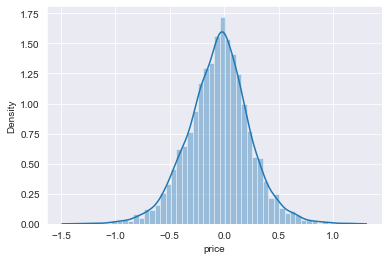

In [1284]:
sns.distplot((y_test1-model3_predictions))

QQ plot: points forming a line that’s roughly straight line- left tail is reducing.

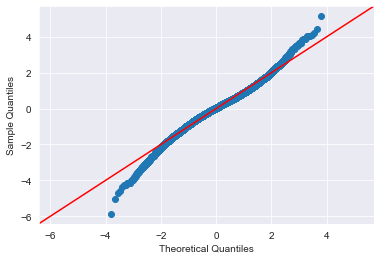

In [1285]:
fig = sm.graphics.qqplot(res.resid, dist=stats.norm, line='45', fit=True)

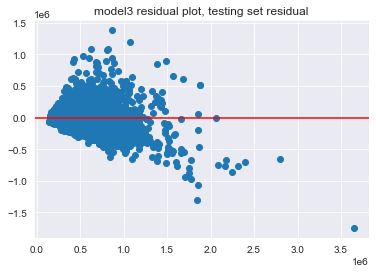

In [1286]:
plt.scatter(np.exp(model3_predictions),(np.exp(y_test1)-np.exp(model3_predictions)))
plt.axhline(y=0, color='r', linestyle='-')
plt.title("model3 residual plot, testing set residual")
plt.show()

# Prediction with model3

While model4 R2 score went down to 0.65, I decide to go with model with fewer outliers.

here is the prediction w the training set and the residual plot

In [1287]:
# make a prediction w the x_train set
model3_train_prediction = ols3.predict(X)


make a plot between x_train prediction vs y_train 

Text(0.5, 0.98, 'prediction price vs actual sale price')

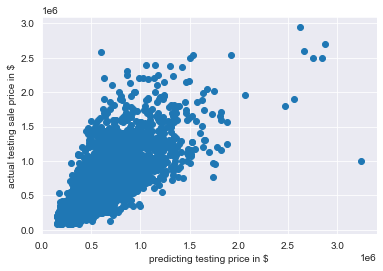

In [1288]:
plt.scatter(np.exp(model3_train_prediction), np.exp(y_train1))
plt.xlabel('predicting testing price in $')
plt.ylabel('actual testing sale price in $')
fig.suptitle('prediction price vs actual sale price')

residual plot of model_3 train set

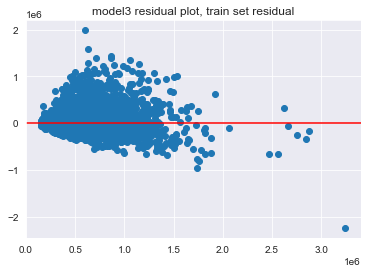

In [1289]:
plt.scatter(np.exp(model3_train_prediction),(np.exp(y_train1)-np.exp(model3_train_prediction)))
plt.axhline(y=0, color='r', linestyle='-')
plt.title("model3 residual plot, train set residual")
plt.show()

In [1290]:
#find the intercept
ols3.intercept_

17.532981338927254

In [1291]:
#find the coefficient
ols3.coef_

array([ 1.19350466e-02,  1.78364559e-01,  8.78376455e-03,  1.09329628e-01,
        3.48814639e-01,  6.95995194e-02,  6.45336288e-02, -2.90828099e-03,
        4.12934765e-05,  1.67096908e+00, -4.83475655e-01, -3.88475582e-03,
        6.72464410e-03, -5.18535528e-01, -4.49937733e-01,  2.85342205e-02,
       -8.27582693e-02, -1.95094564e-01, -4.51274995e-01, -4.99941104e-01,
       -3.51115788e-02, -8.54721310e-02, -6.90280676e-02, -1.22419167e-01,
        3.33720385e-01, -8.20217936e-02, -3.89210239e-01, -1.84043103e-01,
       -3.22361563e-01, -1.28635512e-01, -4.76929481e-01, -1.98388694e-01,
       -4.28971814e-01, -3.64620421e-01, -4.27016625e-01,  9.50096722e-02,
       -3.58941160e-01,  2.52476037e-01])

In [1292]:
#find predicted value with test set
model3_predictions = ols3.predict(z)
model3_predictions

array([13.14278282, 12.67017704, 13.4250091 , ..., 13.45689499,
       13.12676348, 13.28913545])

In [1293]:
# compute a dataframe with city and predict and actual price.
df_predict_price = pd.DataFrame(model3_predictions)

In [1294]:
df_predict_price = pd.DataFrame({'seattle':z['seattle'],'kent':z,['kent'],'bellevue':z['bellevue'],z['actual']:np.exp(y_test1),'predicted':np.exp(model3_predictions)})


SyntaxError: invalid syntax (1341724072.py, line 1)

# Evaluation of the predicted price for Seattle, Kent, Bellevue.

In [ ]:
df_seattle = df_predict_price.loc[df_predict_price['seattle'] ==1]
df_seattle['predicted'] = df_seattle['predicted'].round(decimals = 2)
df_seattle.describe()


In [ ]:
df_kent = df_predict_price.loc[df_predict_price['kent'] ==1]
df_kent.describe()

In [ ]:
df_bellevue = df_predict_price.loc[df_predict_price['bellevue'] ==1]
df_bellevue.describe()

In [ ]:
final_pd = pd.concat([np.exp(y_train1),x_train1],axis =1)
final_pd.head()

In [ ]:
seattle_MAE = metrics.mean_absolute_error(df_seattle['actual'],df_seattle['predicted'])
seattle_MSE = metrics.mean_squared_error(df_seattle['actual'],df_seattle['predicted'])
print('Mean Absolute Error :',seattle_MAE)
print('Mean squared Error :', seattle_MSE)
print('Root Mean squared Error :',math.sqrt(seattle_MSE))
#print('Mean squared Error :', np.sqrt(metrics.mean_squared_error(df_seattle['actual'],df_seattle['predicted']))
#print('Root Mean squared Error :', (np.sqrt(abs(round(y)-round(x)))**2))
#print('Mean Squared Error :', metrics.mean_squared_error(df_seattle['actual'],df_seattle['predicted'])
#print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(df_seattle['actual'],df_seattle['predicted']))

In [ ]:
kent_MAE = metrics.mean_absolute_error(df_kent['actual'],df_kent['predicted'])
kent_MSE = metrics.mean_squared_error(df_kent['actual'],df_kent['predicted'])
print('Mean Absolute Error :',kent_MAE)
print('Mean squared Error :', kent_MSE)
print('Root Mean squared Error :',math.sqrt(kent_MSE))




#print('Mean Absolute Error :', metrics.mean_absolute_error(df_kent['actual'],df_kent['predicted']))
#print('Mean squared Error :', metrics.mean_squared_error(df_kent['actual'],df_kent['predicted']))

In [ ]:
bellevue_MAE = metrics.mean_absolute_error(df_bellevue['actual'],df_bellevue['predicted'])
bellevue_MSE = metrics.mean_squared_error(df_bellevue['actual'],df_bellevue['predicted'])
print('Mean Absolute Error :',bellevue_MAE)
print('Mean squared Error :', bellevue_MSE)
print('Root Mean squared Error :',math.sqrt(bellevue_MSE))

In [ ]:
39364*39364

In [ ]:
#x = df_seattle['predicted'].mean()
#y = df_seattle['actual'].mean()
#print ('Mean ')
#abs(round(y)-round(x))

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(final_pd.corr(),annot = True)

In [ ]:
project2_raw_df.corr()['price'].sort_values(ascending = False).head(6)

# Recommendations:


Rather focus on property itself as Square footage of the apartments interior living space, Square footage of the land space,Number of bedrooms and Number of bathrooms are top factors that correlated to the sellilng price.

# Next Steps:


While this analysis can help us analyse house sale, there are some additional steps we can take to provide a more detailed analysis.

Further investigate the relationship between individual predictor and outcome as they may not have a linear relationship. Hence, different types of models such as polynomial models that may fit predictors that may not have a linear relationship with the outcome instead of linear model.

Continue to collect data for house sale during covid. Are we starting to see the house sale depends on sqft_living, bedroom and bathroom size since majority of the people are working from home.

Adjust house sale for inflation. We may get a more accurate analysis if house sale is adjusted for inflation. 

Collect additional data for the upcoming year and more. As recession is looming, and the Fed decides to increrase the interest rate, would we able to analyze it and how it impacts the house sale.